<a href="https://colab.research.google.com/github/xanasa14/Finances/blob/main/kdNug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!!pip install pmdarima


['Requirement already satisfied: pmdarima in /usr/local/lib/python3.7/dist-packages (1.8.0)',
 'Requirement already satisfied: scikit-learn>=0.22 in /usr/local/lib/python3.7/dist-packages (from pmdarima) (0.22.2.post1)',
 'Requirement already satisfied: statsmodels!=0.12.0,>=0.11 in /usr/local/lib/python3.7/dist-packages (from pmdarima) (0.12.2)',
 'Requirement already satisfied: joblib>=0.11 in /usr/local/lib/python3.7/dist-packages (from pmdarima) (1.0.1)',
 'Requirement already satisfied: urllib3 in /usr/local/lib/python3.7/dist-packages (from pmdarima) (1.24.3)',
 'Requirement already satisfied: pandas>=0.19 in /usr/local/lib/python3.7/dist-packages (from pmdarima) (1.1.5)',
 'Requirement already satisfied: setuptools!=50.0.0,>=38.6.0 in /usr/local/lib/python3.7/dist-packages (from pmdarima) (53.0.0)',
 'Requirement already satisfied: Cython<0.29.18,>=0.29 in /usr/local/lib/python3.7/dist-packages (from pmdarima) (0.29.17)',
 'Requirement already satisfied: scipy>=1.3.2 in /usr/loc

In [2]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import numpy as np

In [5]:

data = pd.read_csv('/content/drive/MyDrive/YahooData/YahooFinanceData.csv')
data

,Date,MMM,AOS,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AAP,AMD,AES,AFL,A,APD,AKAM,ALK,ALB,ARE,ALXN,ALGN,ALLE,LNT,ALL,GOOGL,MO,AMZN,AMCR,AEE,AAL,AEP,AXP,AIG,AMT,AWK,AMP,ABC,AME,AMGN,APH,...,UHS,UNM,VLO,VAR,VTR,VRSN,VRSK,VZ,VRTX,VFC,V,VNO,VMC,WRB,WAB,WBA,WMT,WM,WAT,WEC,WFC,WELL,WST,WDC,W,WRK,WY,WHR,WMB,WLTW,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
0,2018-01-02,235.639999,61.529999,58.790001,98.410004,192.490005,153.839996,64.309998,177.699997,106.089996,10.980000,10.880000,43.985001,67.599998,165.509995,65.559998,75.010002,131.529999,129.929993,124.050003,224.619995,79.910004,42.110001,101.919998,1073.209961,70.739998,1189.010010,11.80,58.389999,52.990002,72.410004,98.940002,59.500000,141.130005,89.080002,169.910004,94.040001,72.750000,177.000000,87.800003,...,115.599998,54.860001,92.800003,110.980003,59.759998,109.470001,95.830002,53.529999,152.910004,70.075333,114.510002,77.320000,131.869995,46.693333,82.930000,74.949997,98.589996,86.099998,195.690002,65.769997,61.090000,64.029999,99.500000,81.379997,81.019997,64.709999,35.299999,167.990005,31.139999,146.990005,164.300003,47.810001,29.370001,67.879997,68.070000,81.599998,103.709999,124.059998,50.700001,71.769997
1,2018-01-03,235.630005,61.900002,58.919998,99.949997,195.820007,154.550003,65.309998,181.039993,107.050003,11.550000,10.870000,44.115002,69.320000,166.410004,65.940002,74.660004,131.789993,129.320007,124.949997,231.199997,80.250000,41.740002,101.980003,1091.520020,70.480003,1204.199951,11.80,58.090000,52.340000,71.800003,99.550003,60.160000,141.679993,88.449997,169.070007,94.389999,73.389999,180.339996,88.940002,...,113.389999,55.259998,93.290001,111.309998,60.119999,110.900002,95.550003,52.430000,152.009995,69.472694,115.650002,77.099998,134.289993,46.306667,82.260002,75.510002,99.449997,87.349998,197.770004,65.540001,61.560001,64.139999,99.620003,82.669998,78.449997,65.400002,35.610001,168.839996,32.000000,149.740005,162.520004,47.490002,29.330000,69.239998,68.900002,81.529999,105.769997,124.919998,50.639999,72.099998
2,2018-01-04,238.710007,62.189999,58.820000,99.379997,199.250000,156.380005,64.660004,183.220001,111.000000,12.120000,10.830000,44.570000,68.800003,167.050003,65.599998,73.849998,130.220001,126.739998,122.690002,233.300003,81.370003,41.250000,100.800003,1095.760010,70.199997,1209.589966,11.80,57.430000,52.669998,70.949997,100.849998,60.400002,139.610001,87.610001,169.690002,94.180000,73.980003,179.580002,88.629997,...,112.790001,55.750000,93.589996,109.860001,58.650002,111.470001,96.029999,52.599998,153.070007,71.054611,116.080002,74.800003,133.380005,46.493332,83.370003,71.599998,99.540001,88.099998,199.660004,65.309998,62.330002,62.759998,99.589996,82.169998,79.300003,67.040001,35.320000,168.820007,32.549999,151.259995,163.399994,47.119999,29.690001,70.489998,69.360001,82.360001,107.860001,124.739998,50.849998,72.529999
3,2018-01-05,240.570007,62.990002,58.990002,101.110001,202.320007,157.669998,66.370003,185.339996,112.180000,11.880000,10.870000,44.865002,69.900002,168.449997,65.830002,73.739998,131.720001,127.000000,122.800003,241.070007,81.570000,41.080002,101.870003,1110.290039,70.400002,1229.140015,11.80,57.389999,52.650002,70.800003,101.080002,60.650002,140.509995,86.750000,170.270004,95.320000,73.790001,180.649994,89.709999,...,111.970001,55.990002,94.029999,110.870003,58.349998,113.000000,96.879997,52.480000,155.690002,71.280602,118.860001,75.440002,131.899994,46.299999,81.830002,72.919998,100.129997,87.989998,202.229996,64.870003,62.750000,62.369999,100.839996,82.690002,80.750000,67.309998,35.270000,168.479996,32.459999,152.229996,164.490005,46.790001,29.910000,74.150002,69.230003,82.839996,109.540001,125.980003,50.869999,73.360001
4,2018-01-08,239.789993,63.290001,58.820000,99.489998,207.800003,158.929993,66.629997,185.039993,111.389999,12.280000,10.870000,44.980000,70.050003,168.630005,65.879997,72.750000,137.449997,127.279999,119.699997,248.899994,81.239998,41.540001,101.389999,1114.209961,70.309998,1246.869995,11.80,58.070000,52.130001,71.419998,1

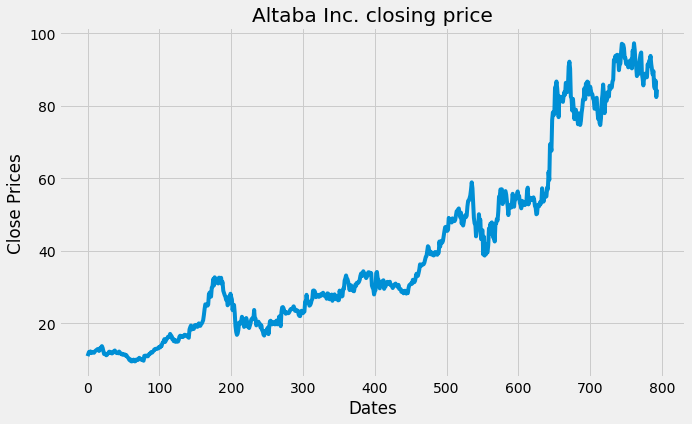

In [7]:
#plot close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(data['AMD'])
plt.title('Altaba Inc. closing price')
plt.show()

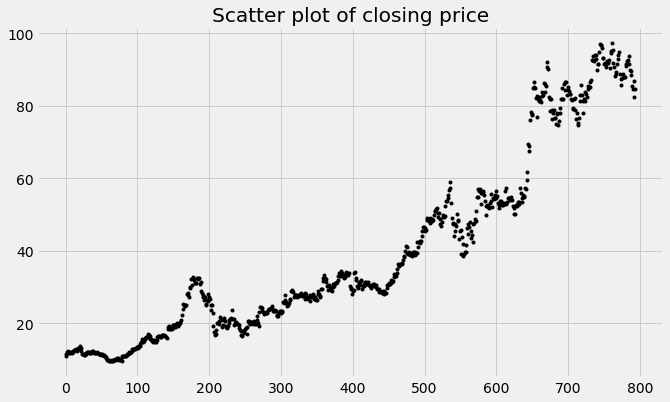

In [9]:
df_close = data['AMD']
df_close.plot(style='k.')
plt.title('Scatter plot of closing price')
plt.show()

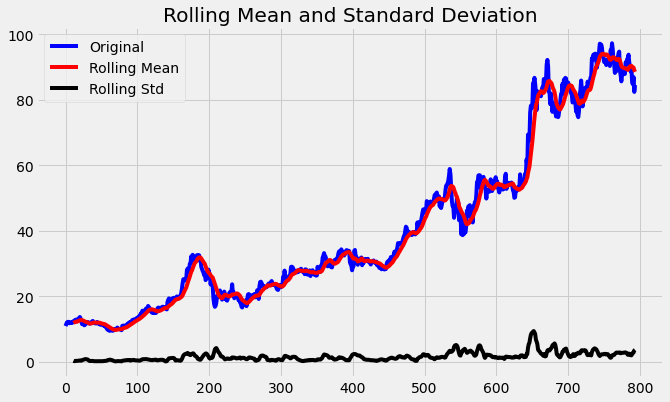

Results of dickey fuller test
Test Statistics                 -0.274104
p-value                          0.929093
No. of lags used                 2.000000
Number of observations used    791.000000
critical value (1%)             -3.438644
critical value (5%)             -2.865201
critical value (10%)            -2.568719
dtype: float64


In [12]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(df_close)

<Figure size 720x432 with 0 Axes>

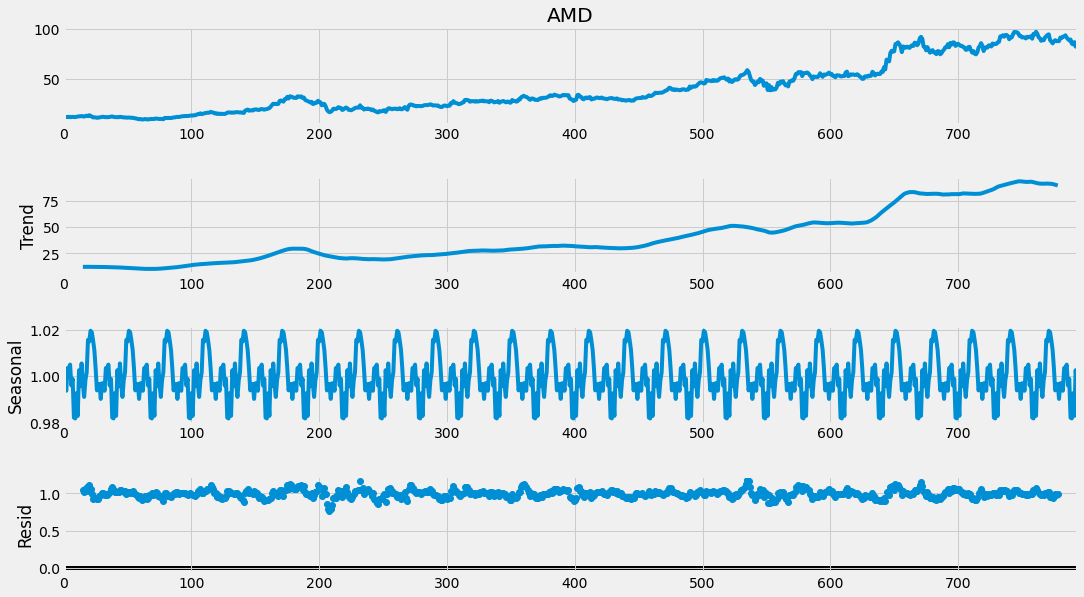

In [13]:
result = seasonal_decompose(df_close, model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

No handles with labels found to put in legend.


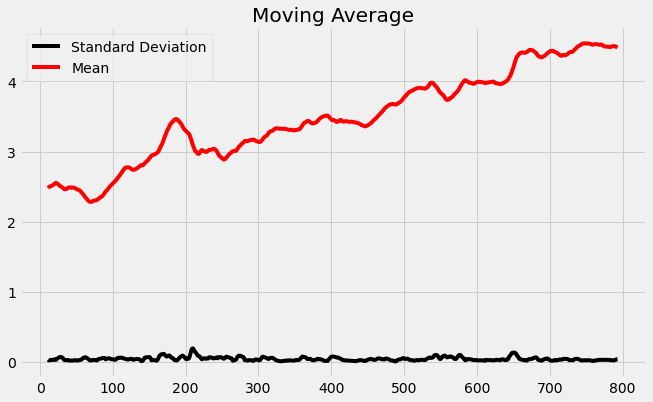

In [14]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df_close)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

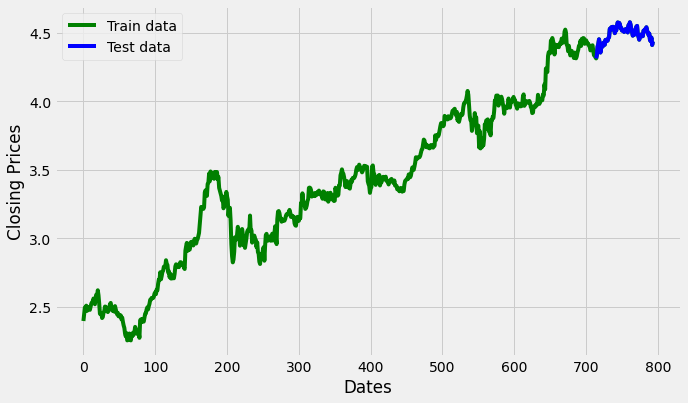

In [15]:
#split data into train and training set
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

In [17]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find             optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-2636.577, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-2639.710, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-2639.209, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-2635.203, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-2639.943, Time=0.14 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-2641.230, Time=0.30 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-2639.267, Time=0.94 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-2639.601, Time=1.02 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=-2639.190, Time=0.21 sec

Best model:  ARIMA(3,1,0)(0,0,0)[0] intercept
Total fit time: 3.271 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  711
Model:               SARIMAX(3, 1, 0)   Log Likelihood                1325.615
Date:                Sun, 28 Feb 2021   

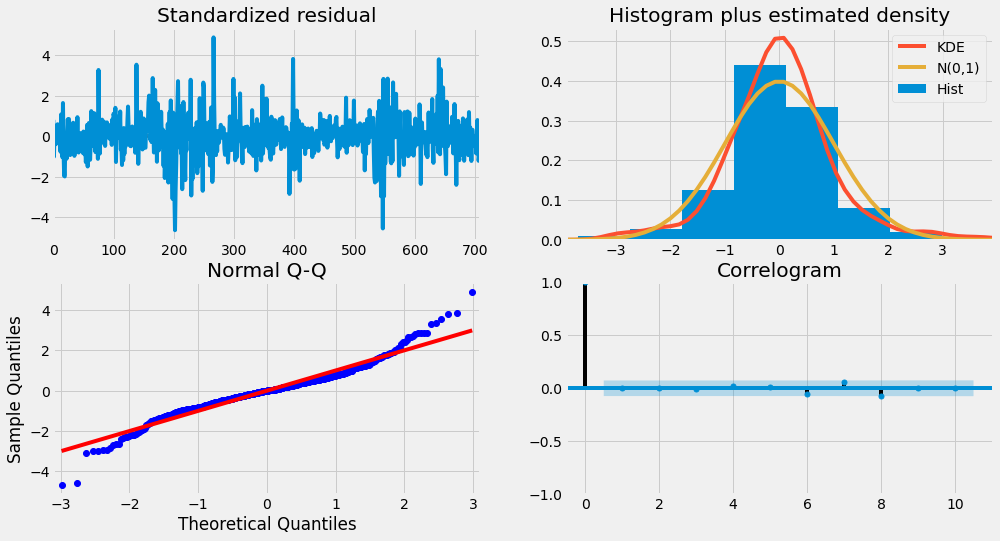

In [18]:
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()


In [19]:
model = ARIMA(train_data, order=(3, 1, 2))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

                             ARIMA Model Results                              
Dep. Variable:                  D.AMD   No. Observations:                  710
Model:                 ARIMA(3, 1, 2)   Log Likelihood                1328.595
Method:                       css-mle   S.D. of innovations              0.037
Date:                Sun, 28 Feb 2021   AIC                          -2643.189
Time:                        04:16:06   BIC                          -2611.232
Sample:                             1   HQIC                         -2630.844
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0026      0.001      1.928      0.054   -4.33e-05       0.005
ar.L1.D.AMD    -1.4078      0.150     -9.370      0.000      -1.702      -1.113
ar.L2.D.AMD    -0.7946      0.153     -5.204    

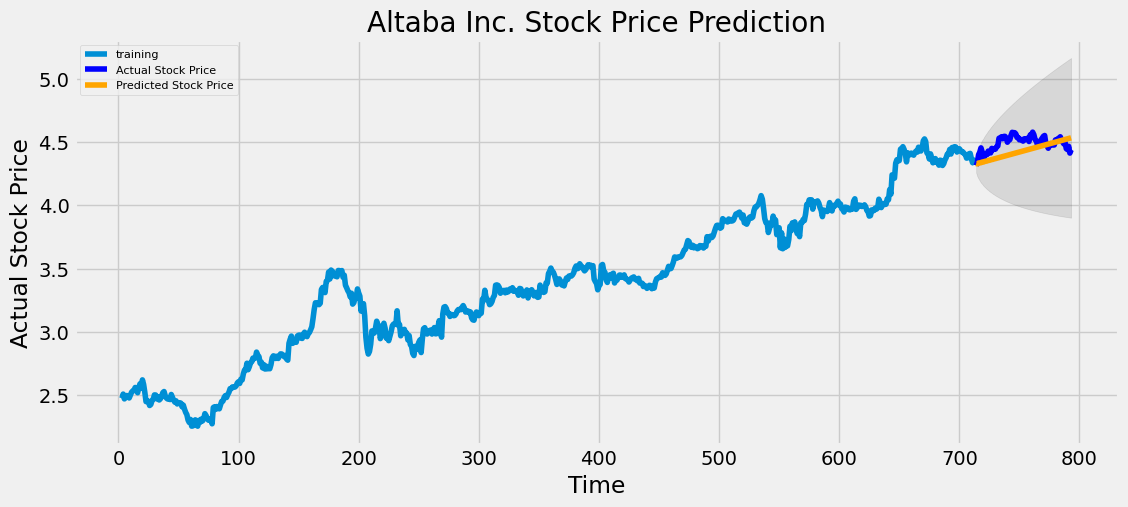

In [21]:
# Forecast
fc, se, conf = fitted.forecast(80
                               , alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('Altaba Inc. Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [22]:
# report performance
mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))


MSE: 0.008043038763166917
MAE: 0.07617653257766585
RMSE: 0.08968299037814761
MAPE: 0.016906135797985465


In [23]:
#For more information on this script 
#https://www.kdnuggets.com/2020/01/stock-market-forecasting-time-series-analysis.html